A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Creamos el DataFrame

In [2]:
df = pd.DataFrame(data=iris.data, columns=iris.get("feature_names"))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Importamos PCA

In [3]:
from sklearn.decomposition import PCA

In [4]:
# Creamos dos variables con PCA para PCA(2) y PCA (3)

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

In [5]:
# Entrenamos las columnas feature con ambas PCA

pca_2.fit(X)
pca_3.fit(X)

PCA(n_components=3)

In [6]:
# Mostramos las varianzas explicativas

print('PCA 2\n')
print(f'Varianza explicativa \n{pca_2.explained_variance_ratio_}')
total_var_pca_2 = pca_2.explained_variance_ratio_.sum() * 100
print(f'\nTotal varianza explicativa: \n{total_var_pca_2.round(2)}')
print('\n-----------\n')
print('PCA 3\n')
print(f'Varianza explicativa \n{pca_3.explained_variance_ratio_}')
total_var_pca_3 = pca_3.explained_variance_ratio_.sum() * 100
print(f'\nTotal varianza explicativa: \n{total_var_pca_3.round(2)}')

PCA 2

Varianza explicativa 
[0.92461872 0.05306648]

Total varianza explicativa: 
97.77

-----------

PCA 3

Varianza explicativa 
[0.92461872 0.05306648 0.01710261]

Total varianza explicativa: 
99.48


In [7]:
# Creamos las variables X_pca2 y X_pca3 para conservar los datos de X

X_pca2 = pca_2.transform(X)
X_pca3 = pca_3.transform(X)

In [8]:
# Mostramos ambos resultados en un Dataframe para observar las diferencias
from IPython.display import display

df_pca_2 = pd.DataFrame(X_pca2)
df_pca_3 = pd.DataFrame(X_pca3)

print('Con PCA 2')
display(df_pca_2.head())
print('\nCon PCA 3')
display(df_pca_3.head())

Con PCA 2


,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755



Con PCA 3


,0,1,2
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


## Visualizamos los datos

### Con PCA 2

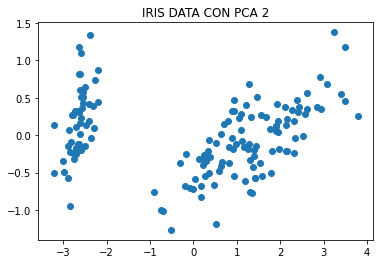

In [9]:
import matplotlib.pyplot as plt 

# Con PCA 2
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.title('IRIS DATA CON PCA 2')
plt.show()

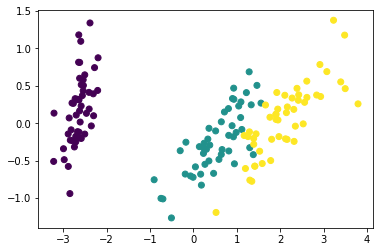

In [10]:
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=iris.target)
plt.show()

### Con PCA 3

In [11]:
import plotly.express as px

fig = px.scatter_3d(
    X_pca3, x=0, y=1, z=2,
    color=y,
    opacity=0.7,
    title=f'Total Explained Variance: {total_var_pca_3.round(2)}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### Una vez realizada la reducción de dimensionalidad, utilizamos `KMeans`

In [12]:
# Importamos Kmeans
from sklearn.cluster import KMeans

# Para PCA 2
print('PARA PCA 2:\n')
kmeans_pca_2 = KMeans(n_clusters=3, random_state=11).fit(X_pca2)
print("kmeans.labels_:", kmeans_pca_2.labels_)
predict_pca_2 = kmeans_pca_2.predict(X_pca2)
print("\npredict:", predict_pca_2)
clusters_pca_2 = kmeans_pca_2.cluster_centers_
print(f'\nKMeans cluster centers con PCA 2:\n {clusters_pca_2}')

print('\n############################')

# Para PCA 3
print('\nPARA PCA 3:\n')
kmeans_pca_3 = KMeans(n_clusters=3, random_state=11).fit(X_pca3)
print("kmeans.labels_:", kmeans_pca_2.labels_)
predict_pca_3 = kmeans_pca_3.predict(X_pca3)
print("\npredict:", predict_pca_2)
clusters_pca_3 = kmeans_pca_3.cluster_centers_
print(f'\nKMeans cluster centers con PCA 3:\n {clusters_pca_3}')

PARA PCA 2:

kmeans.labels_: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

predict: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

KMeans cluster centers con PCA 2:
 [[ 0.66567601 -0.3316042 ]
 [-2.64241546  0.19088505]
 [ 2.34652659  0.27393856]]

############################

PARA PCA 3:

kmeans.labels_: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 

In [13]:
k_pca2_score = metrics.accuracy_score(y, predict_pca_2)
k_pca3_score = metrics.accuracy_score(y, predict_pca_3)

print(f'PCA2_Score: {k_pca2_score.round(2)}')
print(f'PCA3_Score: {k_pca3_score}')

PCA2_Score: 0.24
PCA3_Score: 0.24


## T-SNE

In [14]:
# Importamos T-SNE
from sklearn.manifold import TSNE

# T-SNE 2
tsne_2 = TSNE(n_components=2, random_state=80)
X_tsne2 = tsne_2.fit_transform(X)

# T-SNE 3
tsne_3 = TSNE(n_components=3, random_state=80)
X_tsne3 = tsne_3.fit_transform(X)

### Observaréis que si cambiáis la semilla, cambiará la distribución de los puntos en el gráfico

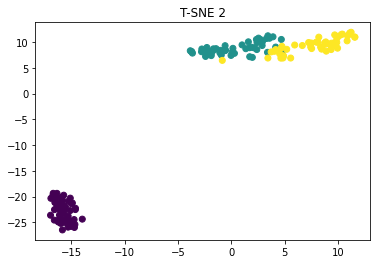

In [15]:
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
plt.title('T-SNE 2')
plt.show()

In [16]:
fig = px.scatter_3d(x=X_tsne3[:, 0], y=X_tsne3[:, 1], z=X_tsne3[:, 2], color=y, opacity=0.7,
title='T-SNE 3')
fig.show()

### DBSCAN

In [17]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 2
# Normalizamos los datos
X_scan_2 = StandardScaler().fit_transform(X_tsne2)

# Definimos DBSCAN 2
db_2 = DBSCAN(eps=0.2, min_samples=5).fit(X_scan_2)
core_samples_mask = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask[db_2.core_sample_indices_] = True
y_db_2 = db_2.labels_

# Para DBSCAN 3
# Normalizamos los datos
X_scan_3 = StandardScaler().fit_transform(X_tsne3)

# Definimos DBSCAN 3
db_3 = DBSCAN(eps=0.2, min_samples=5).fit(X_scan_3)
core_samples_mask = np.zeros_like(db_3.labels_, dtype=bool)
core_samples_mask[db_3.core_sample_indices_] = True
y_db_3 = db_3.labels_

### Finalmente, obtenemos métricas

In [18]:
db2_score = metrics.accuracy_score(y, y_db_2)
db3_score = metrics.accuracy_score(y, y_db_3)

print('TSNE2_Score:', db2_score.round(2))
print('TSNE3_Score:', db3_score)

TSNE2_Score: 0.67
TSNE3_Score: 0.0
